In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

Code from https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a

In [2]:
train_data = pd.read_csv('final_data/train.csv')
test_data = pd.read_csv('final_data/test.csv')

In [3]:
train_data.head()

,review,rating
0,"""This is the only medicine I have found that c...",1
1,"""Worked mildly well, but excellent when paired...",1
2,"""Insertion was not bad. For me it was fast and...",0
3,"""Works wonders. I have my life back. The first...",1
4,"""I have just finished my second week on Tri-Sp...",0


In [4]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train_data.review, train_data.rating)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.review)

In [5]:
print(np.array(test_data.rating)[predicted_categories])

[1 1 1 ... 1 1 1]


In [6]:
# plot the confusion matrix
mat = confusion_matrix(test_data.rating, predicted_categories)
print(mat)

[[ 3005 13202]
 [  290 37269]]


In [7]:
# categories 
categories = train_data.rating.unique()
print(categories)

[1 0]


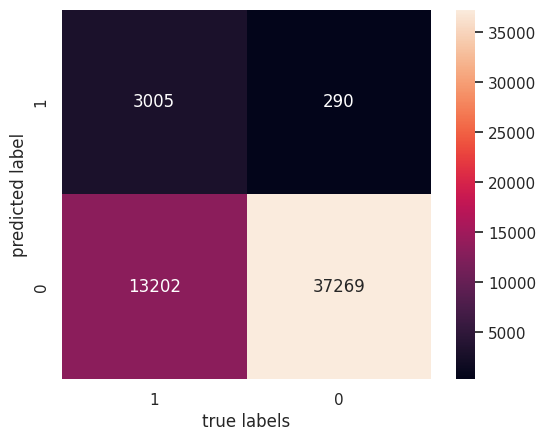

In [8]:
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=categories,yticklabels=categories)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [9]:
print("The accuracy is {}".format(accuracy_score(test_data.rating, predicted_categories)))

The accuracy is 0.7490607447085519


In [10]:
# generate synthetic data from the model
def generate_data(model, categories, n_samples):
    # get the feature names
    feature_names = model.named_steps['tfidfvectorizer'].get_feature_names()
    # get the class priors
    class_priors = model.named_steps['multinomialnb'].class_log_prior_
    # get the class conditional
    class_conditional = model.named_steps['multinomialnb'].feature_log_prob_
    # get the number of features
    n_features = len(feature_names)
    # get the number of classes
    n_classes = len(categories)
    # generate the data
    data = []
    # choose the data based on the class priors
    for i in range(n_samples):
        # randomly choose a class
        category = np.random.choice(categories, p=np.exp(class_priors))
        # randomly choose the number of words
        n_words = np.random.randint(1, 100)
        # randomly choose the words
        words = np.random.choice(feature_names, size=n_words, replace=True, p=np.exp(class_conditional[category]))
        # add the data
        data.append((category, " ".join(words)))
    # convert data to a pandas dataframe
    data = pd.DataFrame(data, columns=["rating", "review"])
    # return the data without the index
    return data


In [11]:
train_data.shape[0]

145167

In [12]:
int((train_data.shape[0])/4)

36291

In [13]:
# generate the data
n_samples = (int(train_data.shape[0]/4))
# update n_samples
synthetic_data = generate_data(model, categories, 1000)

/home/codespace/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
# save synthetic data to a csv file
synthetic_data.to_csv("final_data/synthetic_data.csv", index=False)

In [17]:
# Train new model using the synthetic data
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the synthetic data
model.fit(synthetic_data.review, synthetic_data.rating)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.review)

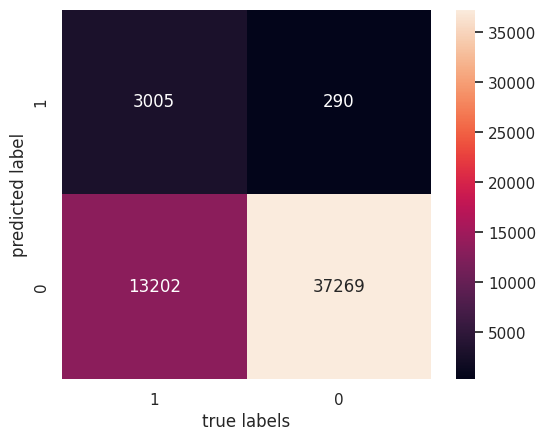

In [18]:
# Evaluate the model on the test data 
# plot the confusion matrix
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=categories,yticklabels=categories)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [19]:
# print the accuracy
print("The accuracy is {}".format(accuracy_score(test_data.rating, predicted_categories)))

The accuracy is 0.3017148383736934
